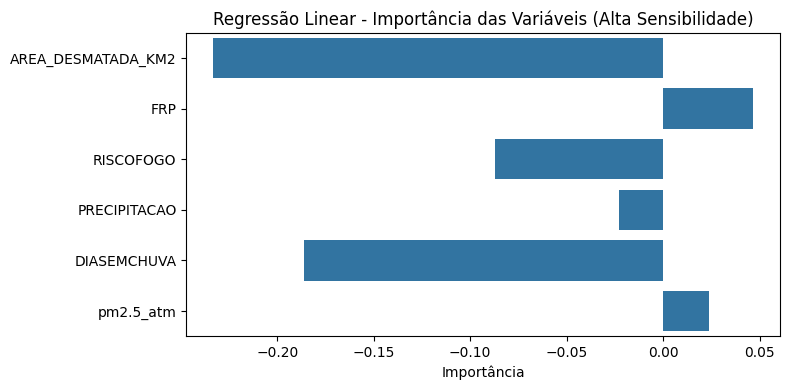

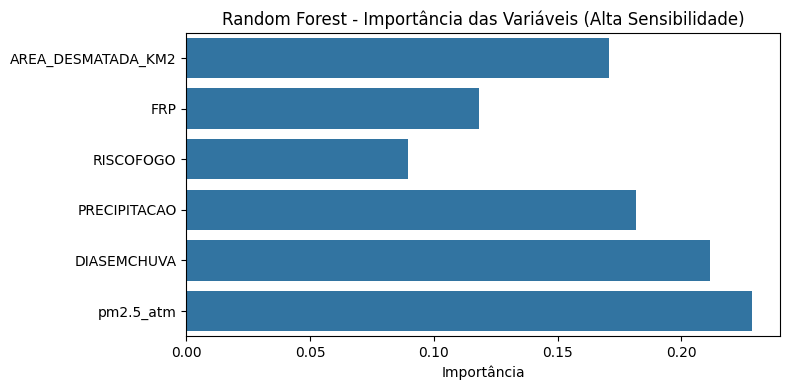

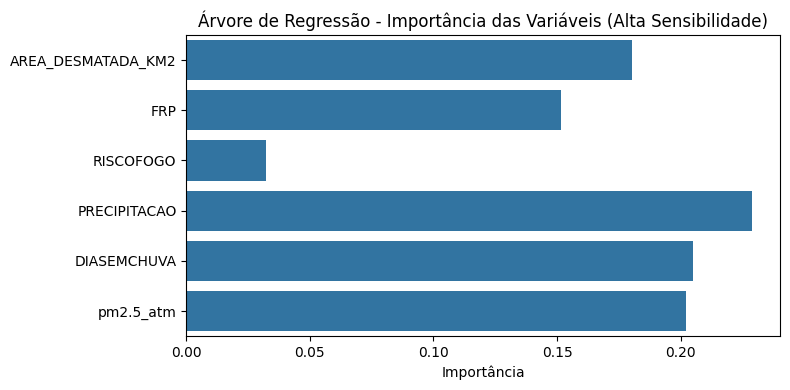

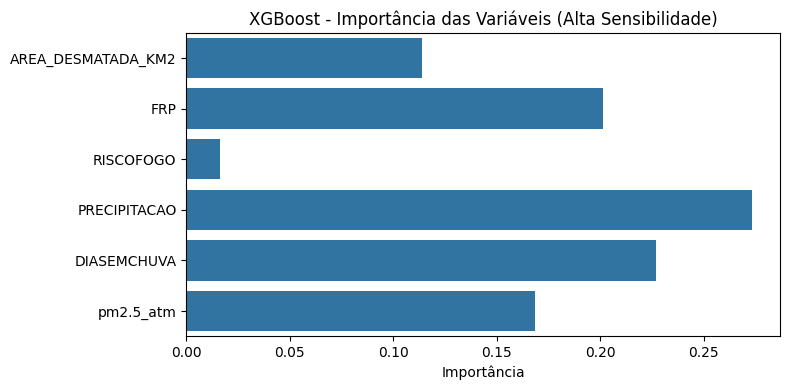

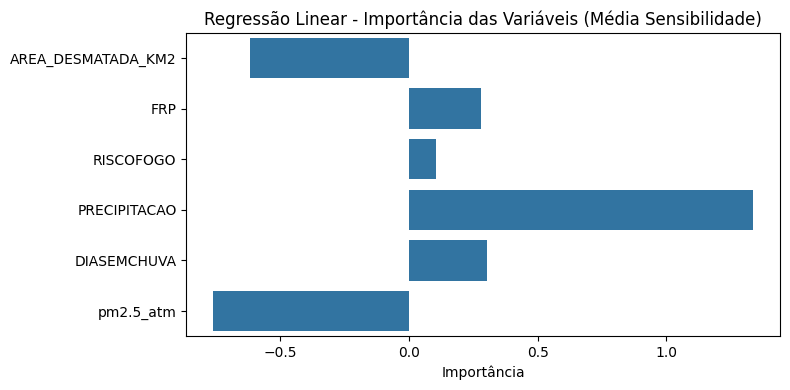

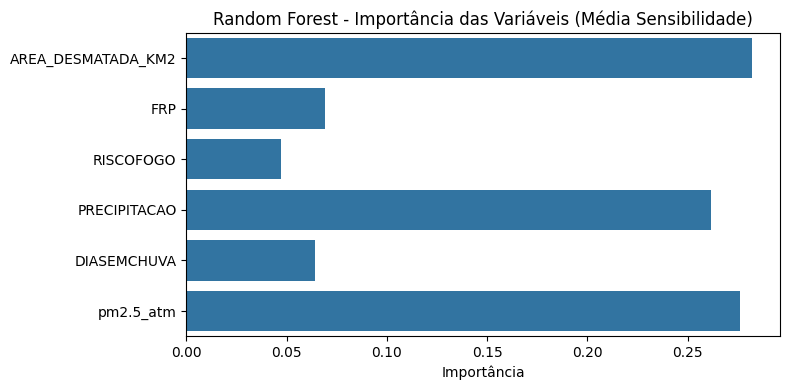

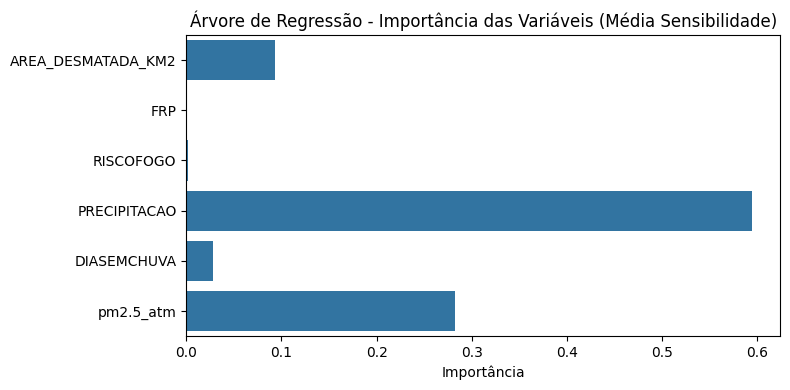

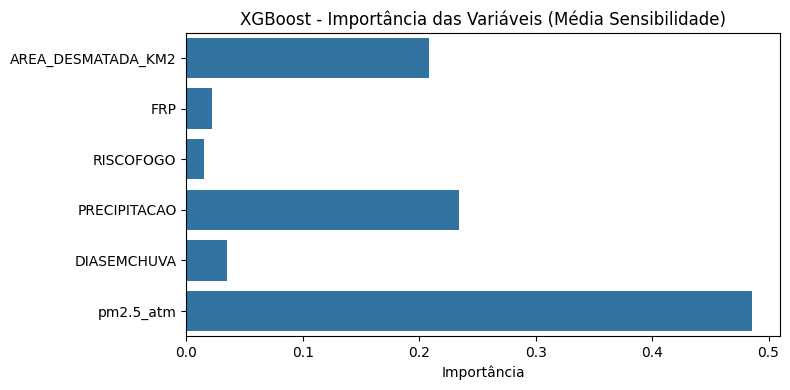

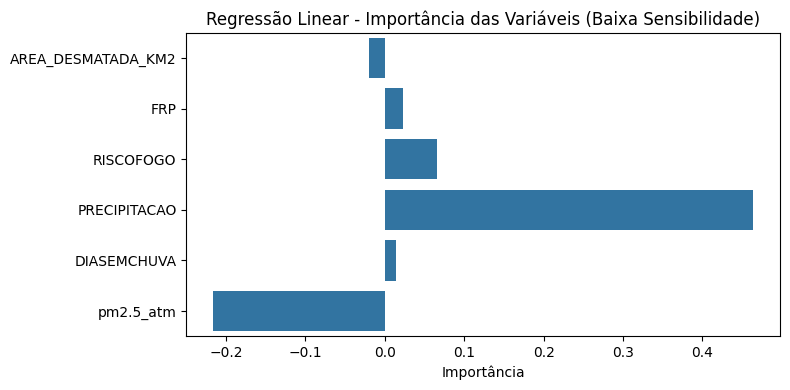

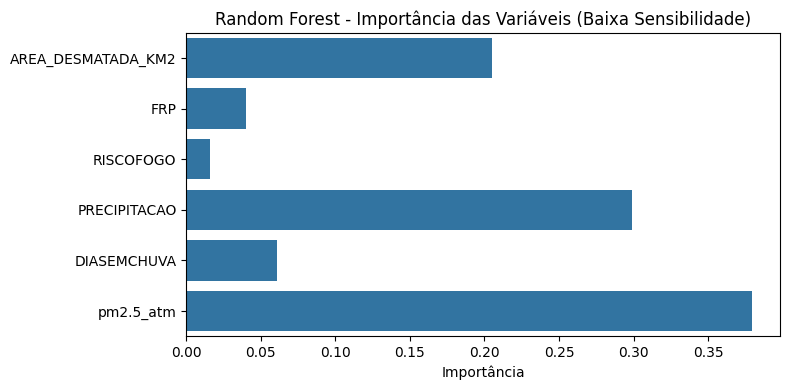

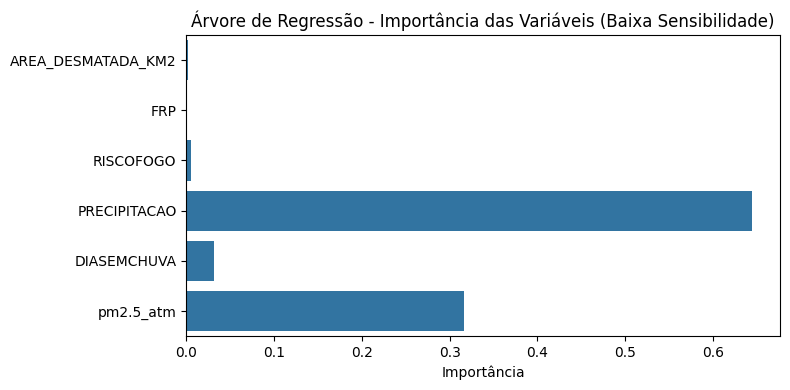

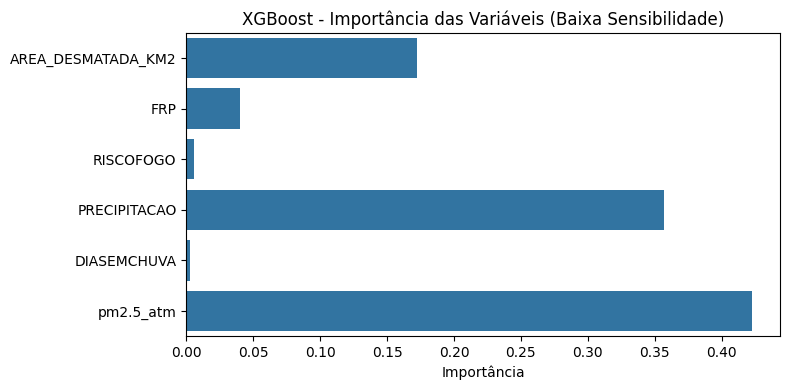

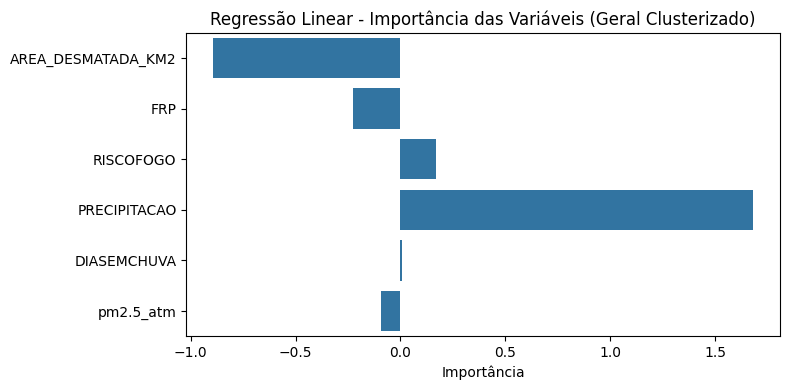

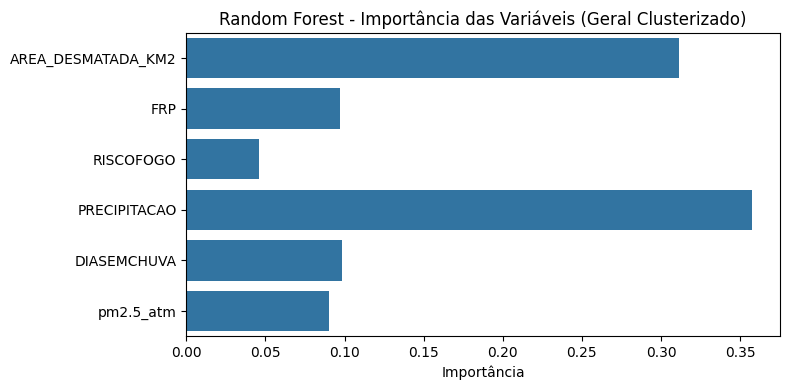

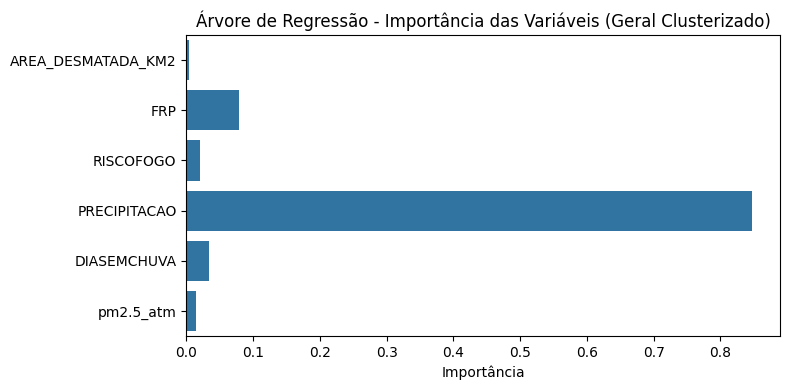

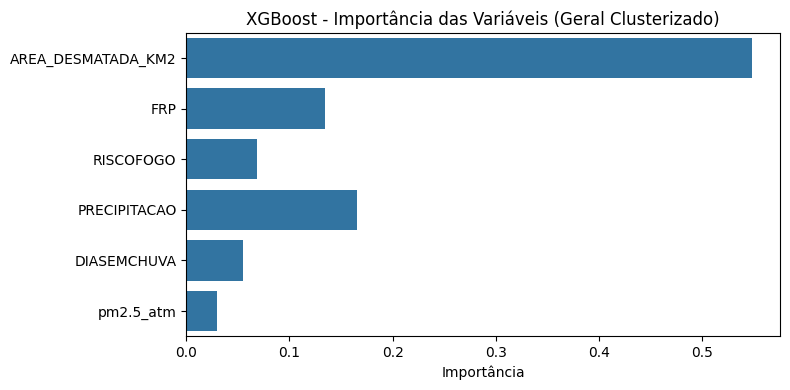

In [9]:


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Caminhos dos arquivos
caminhos = {
    "Alta Sensibilidade": "/Users/mariaisabel/Documents/PUC/5°Periodo/Projeto CD/ENG4040/Divisao/planilha_alta.csv",
    "Média Sensibilidade": "/Users/mariaisabel/Documents/PUC/5°Periodo/Projeto CD/ENG4040/Divisao/planilha_media.csv",
    "Baixa Sensibilidade": "/Users/mariaisabel/Documents/PUC/5°Periodo/Projeto CD/ENG4040/Divisao/planilha_baixa.csv",
    "Geral Clusterizado": "/Users/mariaisabel/Documents/PUC/5°Periodo/Projeto CD/ENG4040/Clustering/planilha/planilha_unificada_clusterizado.csv"
}

# Features e target
features = ["AREA_DESMATADA_KM2", "FRP", "RISCOFOGO", "PRECIPITACAO", "DIASEMCHUVA", "pm2.5_atm"]
target = "OBITOS"

# Função para plotar importâncias
def plot_importancias(importancias, features, modelo, grupo):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=importancias, y=features)
    plt.title(f"{modelo} - Importância das Variáveis ({grupo})")
    plt.xlabel("Importância")
    plt.tight_layout()
    plt.show()

# Loop pelos grupos
for grupo, caminho in caminhos.items():
    df = pd.read_csv(caminho)

    # Corrigir e converter
    df[target] = df[target].replace("-", np.nan)
    for col in features + [target]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Pré-processamento (imputação + normalização)
    df = df[features + [target]].copy()
    for col in features + [target]:
        df[col] = df[col].fillna(df[col].median())

    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])

    X = df[features]
    y = df[target]

    # Regressão Linear
    lr = LinearRegression()
    lr.fit(X, y)
    plot_importancias(lr.coef_, features, "Regressão Linear", grupo)

    # Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)
    plot_importancias(rf.feature_importances_, features, "Random Forest", grupo)

    # Árvore de Regressão
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X, y)
    plot_importancias(dt.feature_importances_, features, "Árvore de Regressão", grupo)

    # XGBoost
    xgb = XGBRegressor(random_state=42, verbosity=0)
    xgb.fit(X, y)
    plot_importancias(xgb.feature_importances_, features, "XGBoost", grupo)

